## Import Packages

In [131]:
import pandas as pd
import numpy as np
import math
from scipy.stats import kurtosis, skew

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

## HW 2.1

## Exract Data

In [132]:
dfa_raw_factors = pd.read_excel('dfa_analysis_data.xlsx', sheet_name = 'factors', index_col = 0) #index_col makes the first column index

In [133]:
def annualize_metrics(df, period = 'M'):
    if period == 'M':
        factor = 12
    elif period == 'w':
        factor == 52
    elif period == 'd':
        factor = 365
    else:
        print('Period unknown')
        
    mean_series = df.mean() * factor
    std_series = df.std() * math.sqrt(factor)
    sharpe_series = mean_series/std_series
    var_series = df.quantile(.05)
    result_df = pd.concat([mean_series, std_series, sharpe_series, var_series], keys = ['Annual Mean', 'Annual Vol', 'Sharpe', 'VaR(.05)'], axis=1)    
    return result_df


In [134]:
dfa_raw_factors_mkt = dfa_raw_factors.drop(columns = ['RF'])
perf_metrics_overall = annualize_metrics(dfa_raw_factors_mkt)
perf_metrics_overall

,Annual Mean,Annual Vol,Sharpe,VaR(.05)
Mkt-RF,0.081421,0.185140,0.439779,-0.08022
SMB,0.022779,0.109802,0.207459,-0.04206
HML,0.041191,0.123780,0.332780,-0.04210


In [135]:
# Let's name the periods for simplicity:
# p1:start - until the end of 1980, p2: 1981 - until the end of 2001, p3: 2022 - until now

dfa_raw_factors_p1 = dfa_raw_factors_mkt.loc[:'1980-12-31']
dfa_raw_factors_p2 = dfa_raw_factors_mkt.loc['1981-01-31':'2001-12-31']
dfa_raw_factors_p3 = dfa_raw_factors_mkt.loc['2002-01-31':]

perf_metrics_p1 = annualize_metrics(dfa_raw_factors_p1).rename(index = {'Mkt-RF': 'Excess Return: <1980', 'SMB': 'Size: <1980', 'HML': 'Value: <1980'})
perf_metrics_p2 = annualize_metrics(dfa_raw_factors_p2).rename(index = {'Mkt-RF': 'Excess Return: 1981-2001', 'SMB': 'Size: 1981-2001', 'HML': 'Value: 1981-2001'})
perf_metrics_p3 = annualize_metrics(dfa_raw_factors_p3).rename(index = {'Mkt-RF': 'Excess Return: 2002-', 'SMB': 'Size: 2002-', 'HML': 'Value: 2002-'})

pd.concat([perf_metrics_p1, perf_metrics_p2, perf_metrics_p3])


,Annual Mean,Annual Vol,Sharpe,VaR(.05)
Excess Return: <1980,0.081138,0.205050,0.395696,-0.083985
Size: <1980,0.033985,0.114568,0.296638,-0.043400
Value: <1980,0.049479,0.133825,0.369727,-0.042910
Excess Return: 1981-2001,0.077257,0.157396,0.490847,-0.064545
Size: 1981-2001,-0.000862,0.118346,-0.007283,-0.046515
Value: 1981-2001,0.063776,0.111183,0.573612,-0.041790
Excess Return: 2002-,0.086187,0.155313,0.554923,-0.079130
Size: 2002-,0.017486,0.086443,0.202280,-0.038230
Value: 2002-,-0.001710,0.107517,-0.015901,-0.041740


## HW 2.2
    a) Yes. We majorly observe premium in total sample and subsamples of factors
    b) Yes. Until 1980, the Size factor's premium is around 3.4% but afterwards, there is a decline
    c) We check the premium of Value factor during 1990s below and see that it did not bring premium (-0.017%)
    d) Even though Excess Return factor's premium did well (~8.6%) Size and Value factors' premiums did not do well (1.7% and -0.017% respectively)


In [136]:
dfa_raw_factors_p4 = dfa_raw_factors_mkt.loc['1990-01-31':'1999-12-31']
perf_metrics_p4 = annualize_metrics(dfa_raw_factors_p4).rename(index = {'Mkt-RF': 'Excess Return: 1990s', 'SMB': 'Size: 1990s', 'HML': 'Value: 1990s'})
perf_metrics_p4


,Annual Mean,Annual Vol,Sharpe,VaR(.05)
Excess Return: 1990s,0.12764,0.138293,0.922966,-0.049445
Size: 1990s,-0.01415,0.103724,-0.136419,-0.051425
Value: 1990s,-0.00107,0.091688,-0.011670,-0.040255


## HW 2.3
    In the whole sample, correlation between excess market return, size and value factors is positive but low (range: 0.115 and 0.315). In period 1926-1980, correlation increases to a range from 0.30 - 0.44 which is not low compared to the overall sample. In period 1981-2001, value factor is negatively correlated with size and excess market return factors. Also, excess market return factor and size have low positive correlation (0.165). From 2002 until now, we observe positive but low correlation (range: 0.09 and 0.306)
    
    To sum up, except the subsample with period 1980-2001, portfolio construction achieves keeping the correlation fairly low

In [137]:
# Draw the correlation matrix and visualize it
def corr_matrix(df):
    corrM = df.corr()
    return corrM
    
def visualize_corr_matrix(df):  
    corrM = corr_matrix(df)
    dims = (8, 6)
    fig, ax = pyplot.subplots(figsize=dims)
    sn.heatmap(data = corrM, ax=ax, cmap ='Reds', linewidth=.2, annot=True)

In [138]:
# Correlation across 3-factors in the whole sample 
corr_matrix(dfa_raw_factors_mkt)

,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.314873,0.227821
SMB,0.314873,1.000000,0.115411
HML,0.227821,0.115411,1.000000


In [139]:
# Until 1980
corr_matrix(dfa_raw_factors_p1)

,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.366298,0.437848
SMB,0.366298,1.000000,0.309133
HML,0.437848,0.309133,1.000000


In [140]:
# 1981-2001
corr_matrix(dfa_raw_factors_p2)

,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.164264,-0.527221
SMB,0.164264,1.000000,-0.453656
HML,-0.527221,-0.453656,1.000000


In [141]:
# 2002-now
corr_matrix(dfa_raw_factors_p3)

,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.306654,0.128505
SMB,0.306654,1.000000,0.096067
HML,0.128505,0.096067,1.000000


## HW 2.4

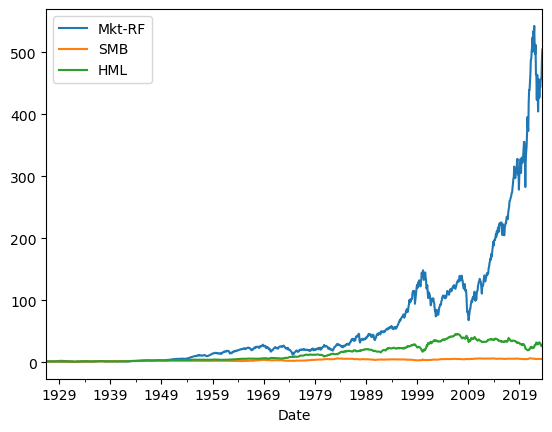

<Figure size 10000x600 with 0 Axes>

In [142]:
figure = ((dfa_raw_factors_mkt + 1).cumprod()).plot()
plt.figure(figsize=(100, 6))
plt.show()

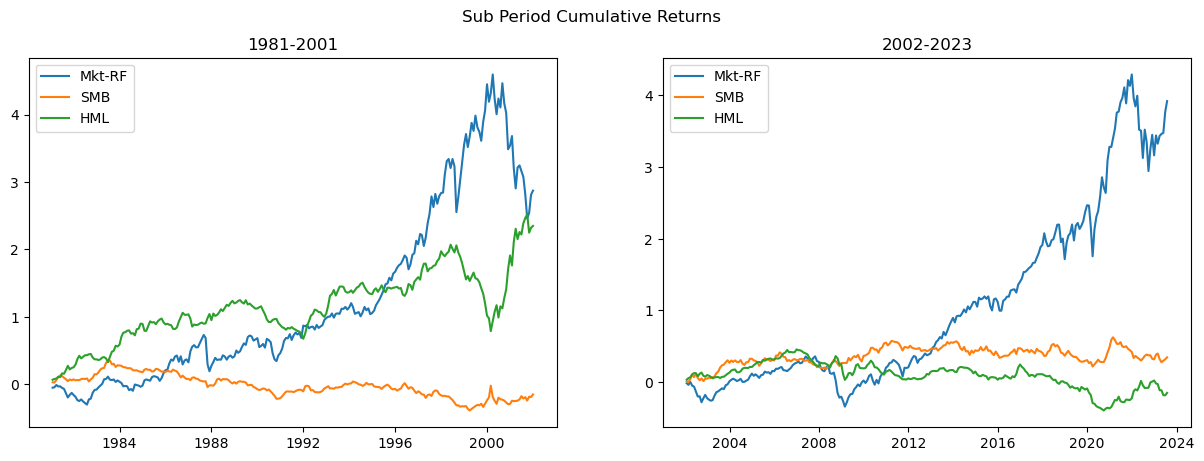

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Sub Period Cumulative Returns')
ax1.plot(((dfa_raw_factors_p2 + 1).cumprod() - 1))
ax2.plot(((dfa_raw_factors_p3 + 1).cumprod() - 1))

fig.set_figwidth(15)
ax1.legend(dfa_raw_factors_p2.columns)
ax2.legend(dfa_raw_factors_p3.columns)

ax1.title.set_text('1981-2001')
ax2.title.set_text('2002-2023')

## HW 2.5
Consistently, the excess market return factor holds value in both sub-samples. The value factor benefits during the Tech Bubble but later sees diminishing premiums. The size factor maintains minimal or negative returns throughout, with the excess market return factor outperforming both in the second sub-sample. Considering the underperformance of size factor, a factor rotation strategy may be more effective. Exploring additional factors like volatility and momentum can potentially generate alpha while still upholding faith in efficient capital markets.

## HW 3.1
    Given the plot below, we don't see any pattern to claim any driver of the difference between annual means

## Exract Data

In [144]:
dfa_raw_portfolios = pd.read_excel('dfa_analysis_data.xlsx', sheet_name = 'portfolios (total returns)', index_col = 0)

In [145]:
dfa_portfolios_excess_ret = dfa_raw_portfolios.sub(dfa_raw_factors['RF'], axis='index')
dfa_portfolios_excess_ret = dfa_portfolios_excess_ret['1981-01-31':]
perf_metrics_portfolio = annualize_metrics(dfa_portfolios_excess_ret)

perf_metrics_portfolio

,Annual Mean,Annual Vol,Sharpe,VaR(.05)
SMALL LoBM,0.008607,0.272612,0.031572,-0.121077
ME1 BM2,0.091784,0.235700,0.389411,-0.095709
ME1 BM3,0.092669,0.197915,0.468227,-0.085817
ME1 BM4,0.117387,0.192404,0.610105,-0.076442
SMALL HiBM,0.129434,0.208295,0.621397,-0.088647
ME2 BM1,0.059889,0.244792,0.244654,-0.103985
ME2 BM2,0.101862,0.204197,0.498842,-0.084928
ME2 BM3,0.107086,0.184794,0.579484,-0.079119
ME2 BM4,0.108899,0.180701,0.602648,-0.077423
ME2 BM5,0.116268,0.213841,0.543715,-0.096701


Text(0, 0.5, 'Annual Mean Excess Return')

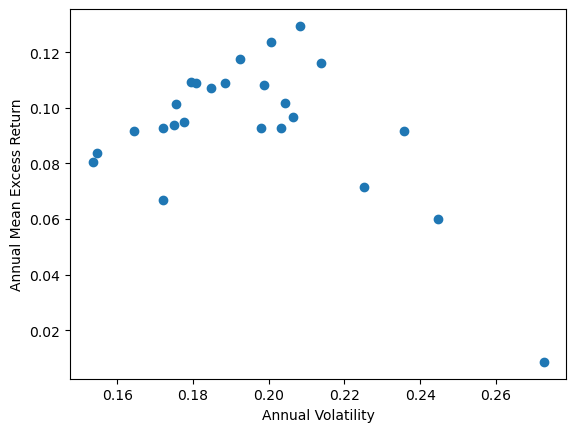

In [146]:
# Plot the annual volatility against annual mean excess return to pinpoint a pattern
plt.scatter(perf_metrics_portfolio.loc[:,['Annual Vol']],perf_metrics_portfolio.loc[:,['Annual Mean']])
plt.xlabel("Annual Volatility")
plt.ylabel("Annual Mean Excess Return")

## HW 3.2
    If CAPM were to be true, we would expect to see the same Treynor Ratio across different portfolios.
    Also, we would expect to see much lower alphas and information ratio than we observe below.
    This means the model is not fitting well and there must be some regressors (not included) that would bring explanatory power to the model
    

In [147]:
def regression_based_performance(factor, ret_data, rf, constant = True): 
    if constant: # This ensures that there is an intercept in the model
        X = sm.tools.add_constant(factor)
    else:
        X = factor
    Y = ret_data

    model = sm.OLS(Y,X, missing='drop').fit()
    if constant:
        beta = model.params[1:] #The first term is the intercept and the rest is the coefficients of the regressors
        alpha = model.params['const'] * 12
    else:
        beta = model.params

    treynor_ratio = (ret_data - rf).mean() * 12/beta[0]
    tracking_error = (model.resid.std() * math.sqrt(12))

    if constant:
        information_ratio = model.params[0] * 12 / tracking_error
    rsquared = model.rsquared

    if constant:
        return (beta,treynor_ratio,information_ratio,alpha,rsquared,tracking_error,model.resid)
    else:
        return (beta,treynor_ratio,rsquared,tracking_error,model.resid)

In [148]:
portfolios = dfa_portfolios_excess_ret.columns
factor = dfa_raw_factors['1981-01-31':]['Mkt-RF']

df_lst= []
for port in portfolios:
    fund_ret = dfa_portfolios_excess_ret['1981-01-31':][port]
    reg = regression_based_performance(factor,fund_ret,rf=0,constant = True)
    beta = reg[0][0]
    treynor_ratio = reg[1]
    information_ratio = reg[2]
    alpha = reg[3]
    r_squared = reg[4]
    df_lst.append(pd.DataFrame([[beta,alpha,r_squared,treynor_ratio,information_ratio]],columns=['Market Beta','Alpha','R-Squared','Treynor Ratio','Information Ratio'],index = [port]))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [149]:
reg_performance = pd.concat(df_lst)
reg_performance

,Market Beta,Alpha,R-Squared,Treynor Ratio,Information Ratio
SMALL LoBM,1.350120,-0.101810,0.598400,0.006375,-0.589319
ME1 BM2,1.160335,-0.003112,0.591270,0.079101,-0.020651
ME1 BM3,1.034045,0.008102,0.665975,0.089618,0.070829
ME1 BM4,0.967278,0.038280,0.616611,0.121358,0.321317
SMALL HiBM,0.988304,0.048608,0.549235,0.130966,0.347576
ME2 BM1,1.333429,-0.049163,0.723908,0.044914,-0.382220
ME2 BM2,1.128858,0.009541,0.745617,0.090235,0.092637
ME2 BM3,1.024793,0.023275,0.750294,0.104495,0.252046
ME2 BM4,0.970403,0.029536,0.703593,0.112220,0.300229
ME2 BM5,1.109383,0.025540,0.656627,0.104805,0.203817


## HW 3.3
    If CAPM were to be true, we would expect to see a very low alpha (ideally 0) and high Beta and R-squared.

In [150]:
fund_ret = dfa_portfolios_excess_ret.loc['1981-01-31':].mean()
factor = reg_performance['Market Beta']
reg = regression_based_performance(factor,fund_ret,0)
beta = reg[0][0]
treynor_ratio = reg[1]
information_ratio = reg[2]
alpha = reg[3]
r_squared = reg[4]
cross_sec_reg = pd.DataFrame([[beta,alpha/12,r_squared]],columns=['Beta','Alpha','R-Squared'],index = ['Cross-Sectional Estimation'])
cross_sec_reg

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Beta,Alpha,R-Squared
Cross-Sectional Estimation,-0.008656,0.016986,0.272833


## HW 3.4
    By analyzing the result of the Cross-Sectional regression (Beta, Alpha, R-squared), we see that the model is not robust.
    In other words, CAPM is not doing a sufficiently good job in predicting the expected excess returns.
    Low Beta and R-squared indicate that there must be other factors (regressors) that need to be included in the model
    